In [ ]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Twitter Api Credentials
consumerKey = "8gkozHxDwmXsvgLvqXMBWcx9T"
consumerSecret = "ycxz3P69xHVYUNY6ViqvYVxAuahB886yLSF4qTxCJ46NnR8tIH"
accessToken = "1331481154189361153-S55qEPfYnPzwLIMFLUonKFt9Z9H3hX"
accessTokenSecret = "i3S0tbdBqBSxtC32UVGZt8VGjFMlFwDUvkeUkEVfiSrfS"

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [25]:
# Extract 200 tweets from the twitter user
posts = api.user_timeline(screen_name="PSG", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 20 tweets
print("Show the 20 recent tweets:\n")
i=1
for tweet in posts[:20]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 20 recent tweets:

1) @marvwon once you win the tournament, can we have a pizza party?

2) @ThrsRllyAWolf That's real love. Thank you, brother.

3) @ThrsRllyAWolf https://t.co/xEj1Zyd9KV

4) @ThrsRllyAWolf Geez that sorta hurts. They fast became my favorite band. But to each their own. Different strokes and alla that.

5) @ThrsRllyAWolf you listen to IDLES, bro?

6) @tonydpoison @consoem What the fuck is this?

7) @ThrsRllyAWolf Stop loving yourself. That's homo as hell. You queerfag. 

Love you, hope you are well, brother. Feel better soon. &lt;3

8) @unanymousmate @DontFlop It's silly to assume you and Don't Flop haven't had a mutually beneficial relationship. It's not like they kept you around 'cause you were the mascot. You brought in the views, they gave you a platform.

Both parties are entitled to share their opinions freely about one another.

9) @BisonBriggz @VerseTracker Not gonna lie, that is hilarious as hell (to someone who knows better, obviously).

10) RT @nixcr

In [26]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 10 rows of data
df.head()

,Tweets
0,"@marvwon once you win the tournament, can we h..."
1,"@ThrsRllyAWolf That's real love. Thank you, br..."
2,@ThrsRllyAWolf https://t.co/xEj1Zyd9KV
3,@ThrsRllyAWolf Geez that sorta hurts. They fas...
4,"@ThrsRllyAWolf you listen to IDLES, bro?"


In [27]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"once you win the tournament, can we have a pi..."
1,"That's real love. Thank you, brother."
2,
3,Geez that sorta hurts. They fast became my fa...
4,"you listen to IDLES, bro?"
5,What the fuck is this?
6,Stop loving yourself. That's homo as hell. Yo...
7,It's silly to assume you and Don't Flop have...
8,"Not gonna lie, that is hilarious as hell (to..."
9,: Do you have a moment to talk about our Lord ...


In [28]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"once you win the tournament, can we have a pi...",0.400000,0.800000
1,"That's real love. Thank you, brother.",0.900000,0.750000
2,,0.000000,0.000000
3,Geez that sorta hurts. They fast became my fa...,0.800000,0.325000
4,"you listen to IDLES, bro?",0.000000,0.000000
5,What the fuck is this?,0.600000,-0.400000
6,Stop loving yourself. That's homo as hell. Yo...,0.683333,0.533333
7,It's silly to assume you and Don't Flop have...,0.837500,-0.050000
8,"Not gonna lie, that is hilarious as hell (to...",0.666667,0.333333
9,: Do you have a moment to talk about our Lord ...,0.000000,0.000000


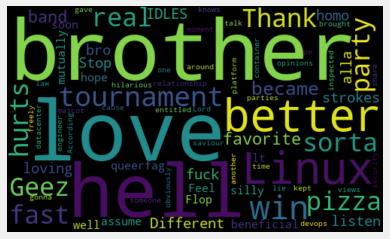

In [29]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
pip install WordCloud

In [30]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"once you win the tournament, can we have a pi...",0.400000,0.800000,Positive
1,"That's real love. Thank you, brother.",0.900000,0.750000,Positive
2,,0.000000,0.000000,Neutral
3,Geez that sorta hurts. They fast became my fa...,0.800000,0.325000,Positive
4,"you listen to IDLES, bro?",0.000000,0.000000,Neutral
5,What the fuck is this?,0.600000,-0.400000,Negative
6,Stop loving yourself. That's homo as hell. Yo...,0.683333,0.533333,Positive
7,It's silly to assume you and Don't Flop have...,0.837500,-0.050000,Negative
8,"Not gonna lie, that is hilarious as hell (to...",0.666667,0.333333,Positive
9,: Do you have a moment to talk about our Lord ...,0.000000,0.000000,Neutral


In [31]:
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1)  once you win the tournament, can we have a pizza party?

2)  That's real love. Thank you, brother.

3)  Geez that sorta hurts. They fast became my favorite band. But to each their own. Different strokes and alla that.

4)  Stop loving yourself. That's homo as hell. You queerfag. 

Love you, hope you are well, brother. Feel better soon. &lt;3

5)   Not gonna lie, that is hilarious as hell (to someone who knows better, obviously).



In [32]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)   What the fuck is this?

2)   It's silly to assume you and Don't Flop haven't had a mutually beneficial relationship. It's not like they kept you around 'cause you were the mascot. You brought in the views, they gave you a platform.

Both parties are entitled to share their opinions freely about one another.



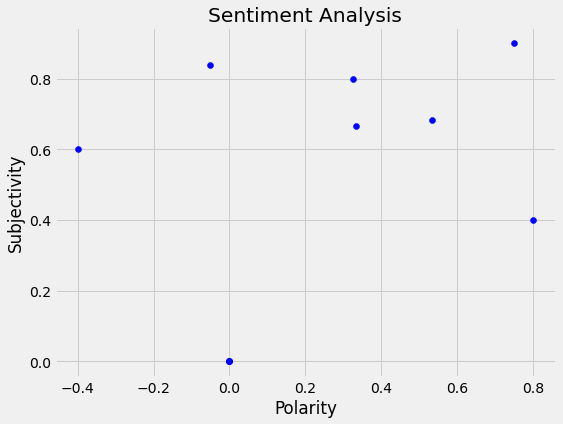

In [33]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [34]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

45.5

In [35]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

18.2

In [36]:
# Show the value counts
df['Analysis'].value_counts()

Positive    5
Neutral     4
Negative    2
Name: Analysis, dtype: int64

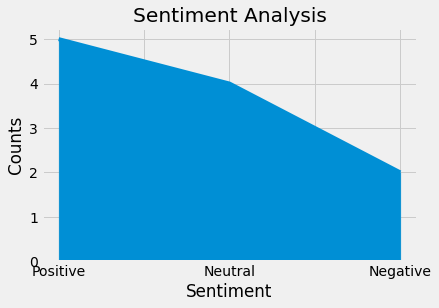

In [38]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()

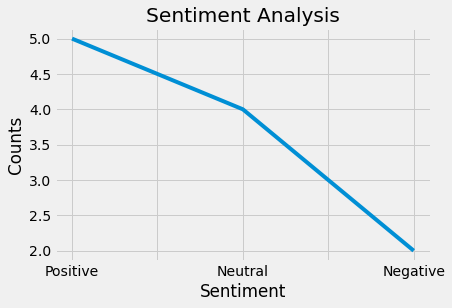

In [39]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()